<a href="https://colab.research.google.com/github/GeniusGun/python/blob/master/pandas/pandas_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 04-1 데이터 시각화가 필요한 이유

## [1] 앤스콤 4분할 그래프 살펴보기
>데이터 시각화를 보여주는 전형적인 사례로 앤스콤 4분할 그래프(Anscombe's quartet)가 있습니다. 이 그래프는 영국의 프랭크 앤스콤(frank Anscombe)이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프 입니다. 그러면 앤스콤이 지적한 '함정'이란 무엇일까요?
>
> ### 앤스콤이 지적한 함정과 데이터 시각화의 필요성
>앤스콤 4분할 그래프를 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있으며 모든 데이터 그룹은 x, y열을 가지고 있습니다. 그런데 이 4개의 데이터 그룹은 각각 편균, 분산과 같은 수칫값이나 상관관계, 회귀선이 같다는 특징이 있습니다. 그래서 이런 결과만 보고 __'데이터 그룹 1, 2, 3, 4의 데이터는 모두 같을 것이다'__ 라고 착각할 수 있습니다. 바로 이것이 앤스콤이 지적한 '함정'입니다. 하지막 각 데이터 그룹을 시각화하면 데이터그룹이 서로 다른 데이터 패턴을 가지고 있다는 점을 금방 알 수 있습니다. 이런 점에서 데이터 시각화는 데이터 분석 분야에서 아주 중요한 요소라고 할 수 있습니다. 그러면 데이터 시각화란 무엇인지 직접 실습하며 알아보겠습니다.

### (1) 앤스콤 데이터 집합 불러온 후 그래프 그리기

#### _1._ 앤스콤 데이터 집합 불러오기
>앤스콤 데이터 집합은 seaborn 라이브러리에 포람되어 있습니다. seaborn 라이브러리의 load_dataset 메서드에 문자열 sndcombe을 전달하면 앤스콤 데이터 집합을 불러올 수 있습니다. 이때 데이터프레임의 열 이름 중 dataset 열이 데이터 그룹을 구분한다는 것을 알 수 있습니다.

In [19]:
import seaborn as sns
anscombe = sns.load_dataset('anscombe')
print(anscombe.sample(10).sort_index())
print('-'*30)
print(type(anscombe))
print('-'*30)
print(anscombe.groupby('dataset')['x', 'y'].mean())
print('-'*30)
print(anscombe.groupby('dataset')['x', 'y'].max())
print('-'*30)
print(anscombe.groupby('dataset')['x', 'y'].min())
print('-'*30)
print(anscombe.groupby('dataset')['x', 'y'].median())

   dataset     x      y
6        I   6.0   7.24
11      II  10.0   9.14
21      II   5.0   4.74
26     III  11.0   7.81
28     III   6.0   6.08
30     III  12.0   8.15
34      IV   8.0   5.76
38      IV   8.0   7.04
40      IV  19.0  12.50
41      IV   8.0   5.56
------------------------------
<class 'pandas.core.frame.DataFrame'>
------------------------------
           x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909
------------------------------
            x      y
dataset             
I        14.0  10.84
II       14.0   9.26
III      14.0  12.74
IV       19.0  12.50
------------------------------
           x     y
dataset           
I        4.0  4.26
II       4.0  3.10
III      4.0  5.39
IV       8.0  5.25
------------------------------
           x     y
dataset           
I        9.0  7.58
II       9.0  8.14
III      9.0  7.11
IV       8.0  7.04


#### _2._ matplotlib 라이브러리로 그래프 그리기
>앤스콤 데이터 집합을 잘 불러왔나요? 데이터 집합이 준비되었으면 이제 그래프로 시각화를 하면 됩니다. 이 책에서는 그래프를 그리기 위해 matplotlib 라이브러리를 사용합니다. 먼저 그래프를 그리기 위해 matplotlib 라이브러리를 불러오겠습니다.

In [0]:
%matplotlib inline      
# 책에는 [ %matplotlib notebook ] 이라고 되어있지만 colab의 경우 지금과 같이 사용한다.
import matplotlib.pyplot as plt

#### _3._
>다음은 anscombe 데이터프레임의 dataset 열에서 데이터값이 1인것만 추출한 것입니다.

In [21]:
dataset_1 = anscombe[anscombe['dataset']=='I']
print(dataset_1)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68


#### _4._
>선 그래프는 plot 메서드로 그릴 수 있습니다. plot 메서드에 x, y축 데이터를 전달하면 선 그래프가 나타납니다. 앞에서 준비한 dataset_1의 x, y열을 전달하세요.

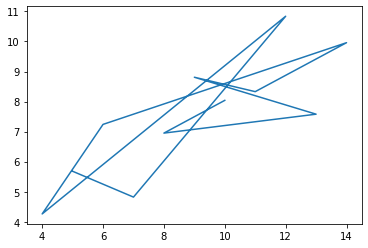

In [22]:
plt.plot(dataset_1['x'], dataset_1['y'])

#### _5._
>plot 메서드는 기본적으로 선으로 그래프를 그립니다. 만약 점으로 그래프를 그리려면 o을 세번째 인자로 전달하면 됩니다.

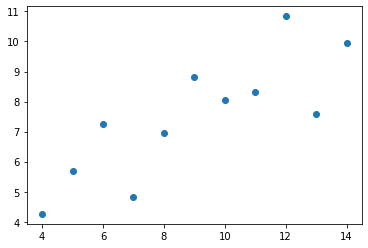

In [23]:
plt.plot(dataset_1['x'], dataset_1['y'],'o')

## [2] 앤스콤 데이터 집합 모두 사용해 그래프 만들기
> 앤스콤 데이터 집합은 4개의 데이터 그룹으로 구성되어 있으며 각 데이터 그룹의 차이를 파악하려면 그래프로 시각화 해야 한다고 했습니다. 이번에는 모든 데이터 그룹에 대하여 그래프를 그려보겠습니다.
>#### matplotlib 라이브러리로 그래프 그리기
>이번에 소개할 내용은 'matp;otlib 라이브러리로 그래프를 그리는 방법'입니다. 아래에 정리한 과정을 잘 읽어보면 블록을 조립하는 과정와 비슷하다는 것을 알 수 있을 것입니다.
>> ① 전체 그래프가 위치할 기본 틀을 만듭니다.
>>
>> ② 그래프를 그려 넣을 그래프 격자를 만듭니다.
>>
>> ③ 그런 다음 격자에 그래프를 하나씩 추가합니다. 격자에 그래프가 추가되는 순서는 왼쪽에서 오른쪽 방향입니다.
>>
>> ④ 만약 격자의 첫 번째 행이 꽉차면 두 번째 행에 그래프를 그려 넣습니다.
>
>즉, 이후 실습에서 핸스콤 데이터 집합으로 그리게 될 그래프의 격자 크기는 4이고 세 번째 그래프의 경우 2행 1열위치에 그려집니다. 그러면 바로 그래프를 그려 보겠습니다.

### (1) 한번에 4개의 그래프 그리기

#### _1._
>앤스콤 데이터프레임의 dataset 열의 값이 Ⅰ, Ⅱ, Ⅲ, Ⅳ인 것을 불린 추출하여 dataset_1, 2, 3, 4에 저장합니다. (dataset_1은 앞에서 추출 했습니다.)

In [0]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

#### _2._
>먼저 그래프 격자가 위치할 기본 틀을 만듭니다.

In [25]:
fig  = plt.figure()

<Figure size 432x288 with 0 Axes>

#### _3._
>그런 다음 add_subplot 메서드로 그래프 격자를 그립니다. 기본 틀(fig)에 격자를 추가한다는 기분으로 add_subplot 메서드를 사용하면 됩니다. add_subplot의 첫 번째 인자에는 그래프 기본 틀의 행 크기를, 두 번째 인자에는 그래프 기본 틀의 열 크기를 지정합니다.

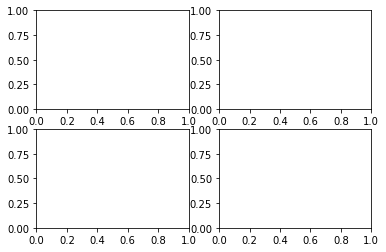

In [26]:
fig  = plt.figure()                  # fig = plt.figure() 를 다른 셀에 쓸 경우 그래프가 나타나지 않을 수 도 있습니다.
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

#### _4._
>이제 plot 메서드에 데이터를 전달하여 그래프를 그리면 됩니다. 이번에는 점으로 그래프를 표현했습니다. 그래프를 확인하려면 fig를 반드시 입력해야 합니다.
>
>참고 : 점의 색상은 매 실행시 마다 다를 수 있습니다.

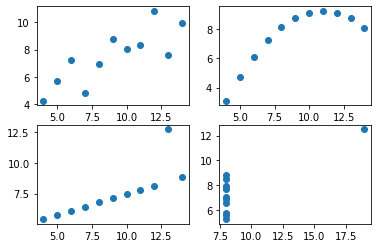

In [27]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

#### _5._
>각각의 스래프를 쉽게 구분할 수 있도록 그래프 격자에 제목을 추가해 볼까요? set_title 메서드로 그래프 이름을 전달하면 그래프 격자에 제목이 추가됩니다.

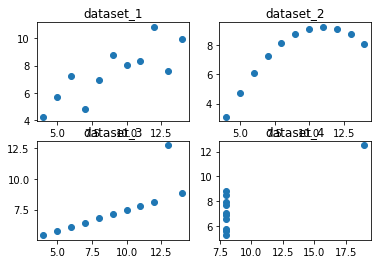

In [28]:
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')
fig

#### _6._
>기본 틀(fig)에도 제목을 추가해 볼까요? 기본 틀에 제목을 추가하려면 suptitle 메서드를 사용하면 됩니다.

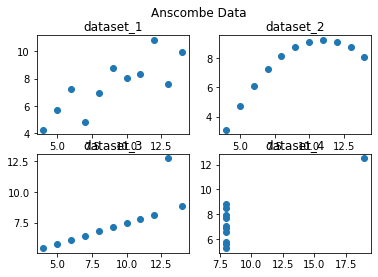

In [29]:
fig.suptitle('Anscombe Data')
fig

#### _7._
>그런데 [ 과정 5, 6 ]의 그래프를 보면 각 그래프의 이름과 숫자가 겹쳐 보입니다. 이런 경우에는 tight_layout 메서드를 호출하여 각 그래프의 레이아웃을 조절할 수 있습니다.

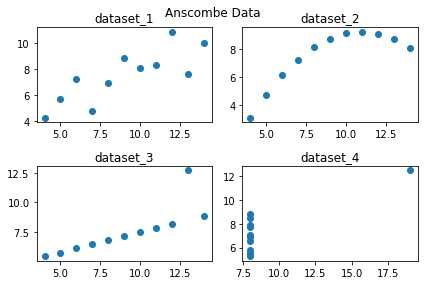

In [30]:
fig.tight_layout()
fig

> 자 어떤가요? 편균, 분산, 상관관계, 회귀선의 통계 수치가 같아도 그래프의 형태는 다를 수 있습니다. 앤스콤 4분할 그래프는 데이터 분석 시 수치에만 의존하면 잘못된 판단을 할 수 있다는 것을 알려주는 좋은 예시입니다.

# 04-2 matolitlib 라이브러리 자유자재로 사용하기
> [ 04-1 ]에서 앤스콤 4분할 그래프를 그릴 때 제목을 추가하기 위해 set_title 메서드를 사용했습니다. 이밖에도 matplotlib 라이브러리에는 그래프를 그리기 위한 다양한 메서드가 준비되어 있습니다. 지금부터 matplotlib 라이브러리에는 어떤 메서드가 있는지 실습을 통해 하나씩 알아보겠습니다. 더불어 고급 그래프 라이브러리인 seaborn 라이브러리도 함께 알아보겠습니다.

## [1] 기초 그래프 그리기
> seaborn 라이브러리에는 tips라는 데이터 집합이 있습니다. tips 데이터 집합은 어떤 식당에서 팁을 지불한 손님의 정보를 모아둔 것입니다. 이번 실습에서는 tips 데이터 집합을 사용해 다양한 그래프를 그려보겠습니다. 그래프를 이해하는 데 필요한 개념은 그래프를 그리기 전에 설명하겠습니다.

### (1) 기초그래프 그리기 - 히스토그램, 산점도 그래프 , 박스 그래프

#### _1._
> tips 데이터 집합을 불러와 변수 tips에 저장합니다. tips 데이터프레임은 지불 금액, 팁, 성별, 흡연 유무, 요일, 시간, 전체 인원 정보를 담고 있습니다.

In [31]:
tips = sns.load_dataset('tips')
print(tips.sample(10).sort_index())
print('-'*60)
print(type(tips))
print('-'*60)
print(tips.info())

     total_bill   tip     sex smoker   day    time  size
4         24.59  3.61  Female     No   Sun  Dinner     4
10        10.27  1.71    Male     No   Sun  Dinner     2
67         3.07  1.00  Female    Yes   Sat  Dinner     1
106       20.49  4.06    Male    Yes   Sat  Dinner     2
117       10.65  1.50  Female     No  Thur   Lunch     2
133       12.26  2.00  Female     No  Thur   Lunch     2
196       10.34  2.00    Male    Yes  Thur   Lunch     2
206       26.59  3.41    Male    Yes   Sat  Dinner     3
218        7.74  1.44    Male    Yes   Sat  Dinner     2
234       15.53  3.00    Male    Yes   Sat  Dinner     2
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smo

#### _2._
>히스토그램은 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용하는 그래프입니다. 이때 데이터프레임의 total_bill, tip 등의 열을 변수라고 부르기도 합니다. 그리고 변수를 하나만 사용해서 그린 그래프를 '일변량 그래프'라고 부릅니다.

#### _3._
>기본 틀(fig)을 마련하고 그래프 격자(axes1)를 구성하는 것까지는 앞에서 진행한 실습과 동일합니다.

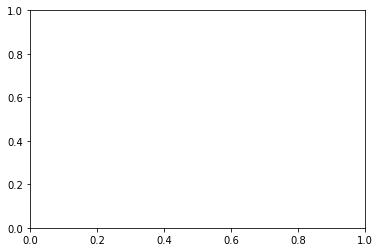

In [32]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

#### _4._
>hist 메서드에 total_bill 열을 전달하면 히스토그램이 만들어집니다. 이때 x축의 간격은 bins 인잣값으로 조정할 수 있습니다. bins 인잣값을 10으로 지정하면 x축의 간격을 10으로 조정할 수 있습니다. 나머지는 그래프의 제목과 x, y축의 제목을 추가하는 코드립니다.

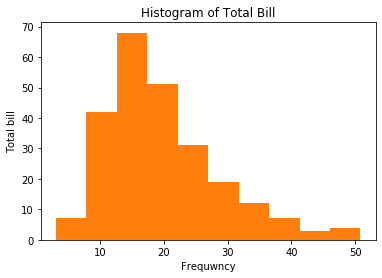

In [35]:
axes1.hist(tips['total_bill'], bins = 10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequwncy')
axes1.set_ylabel('Total bill')
fig